## MLearn 210: Titanic Kaggle Challenge - Kei and Aditi

some intro paragraph here....

In [1]:
# Load the training and testing data
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("train.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Cleaning:
Before analyzing the data, we will run a pairwise plot and and correlation matrix.  However, before we can do that, we will clean the data so that we can produce a more extensive plot and correlation matrix.
- Missing values for Age will be replaced with the mean age value.
- Sex and Embarked will be encoded to numeric values

Missing values
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Encoding for Sex
0: female
1: male

Encoding for Embarked
0: ?
1: C
2: Q
3: S

Correlation matrix

Features pair plot


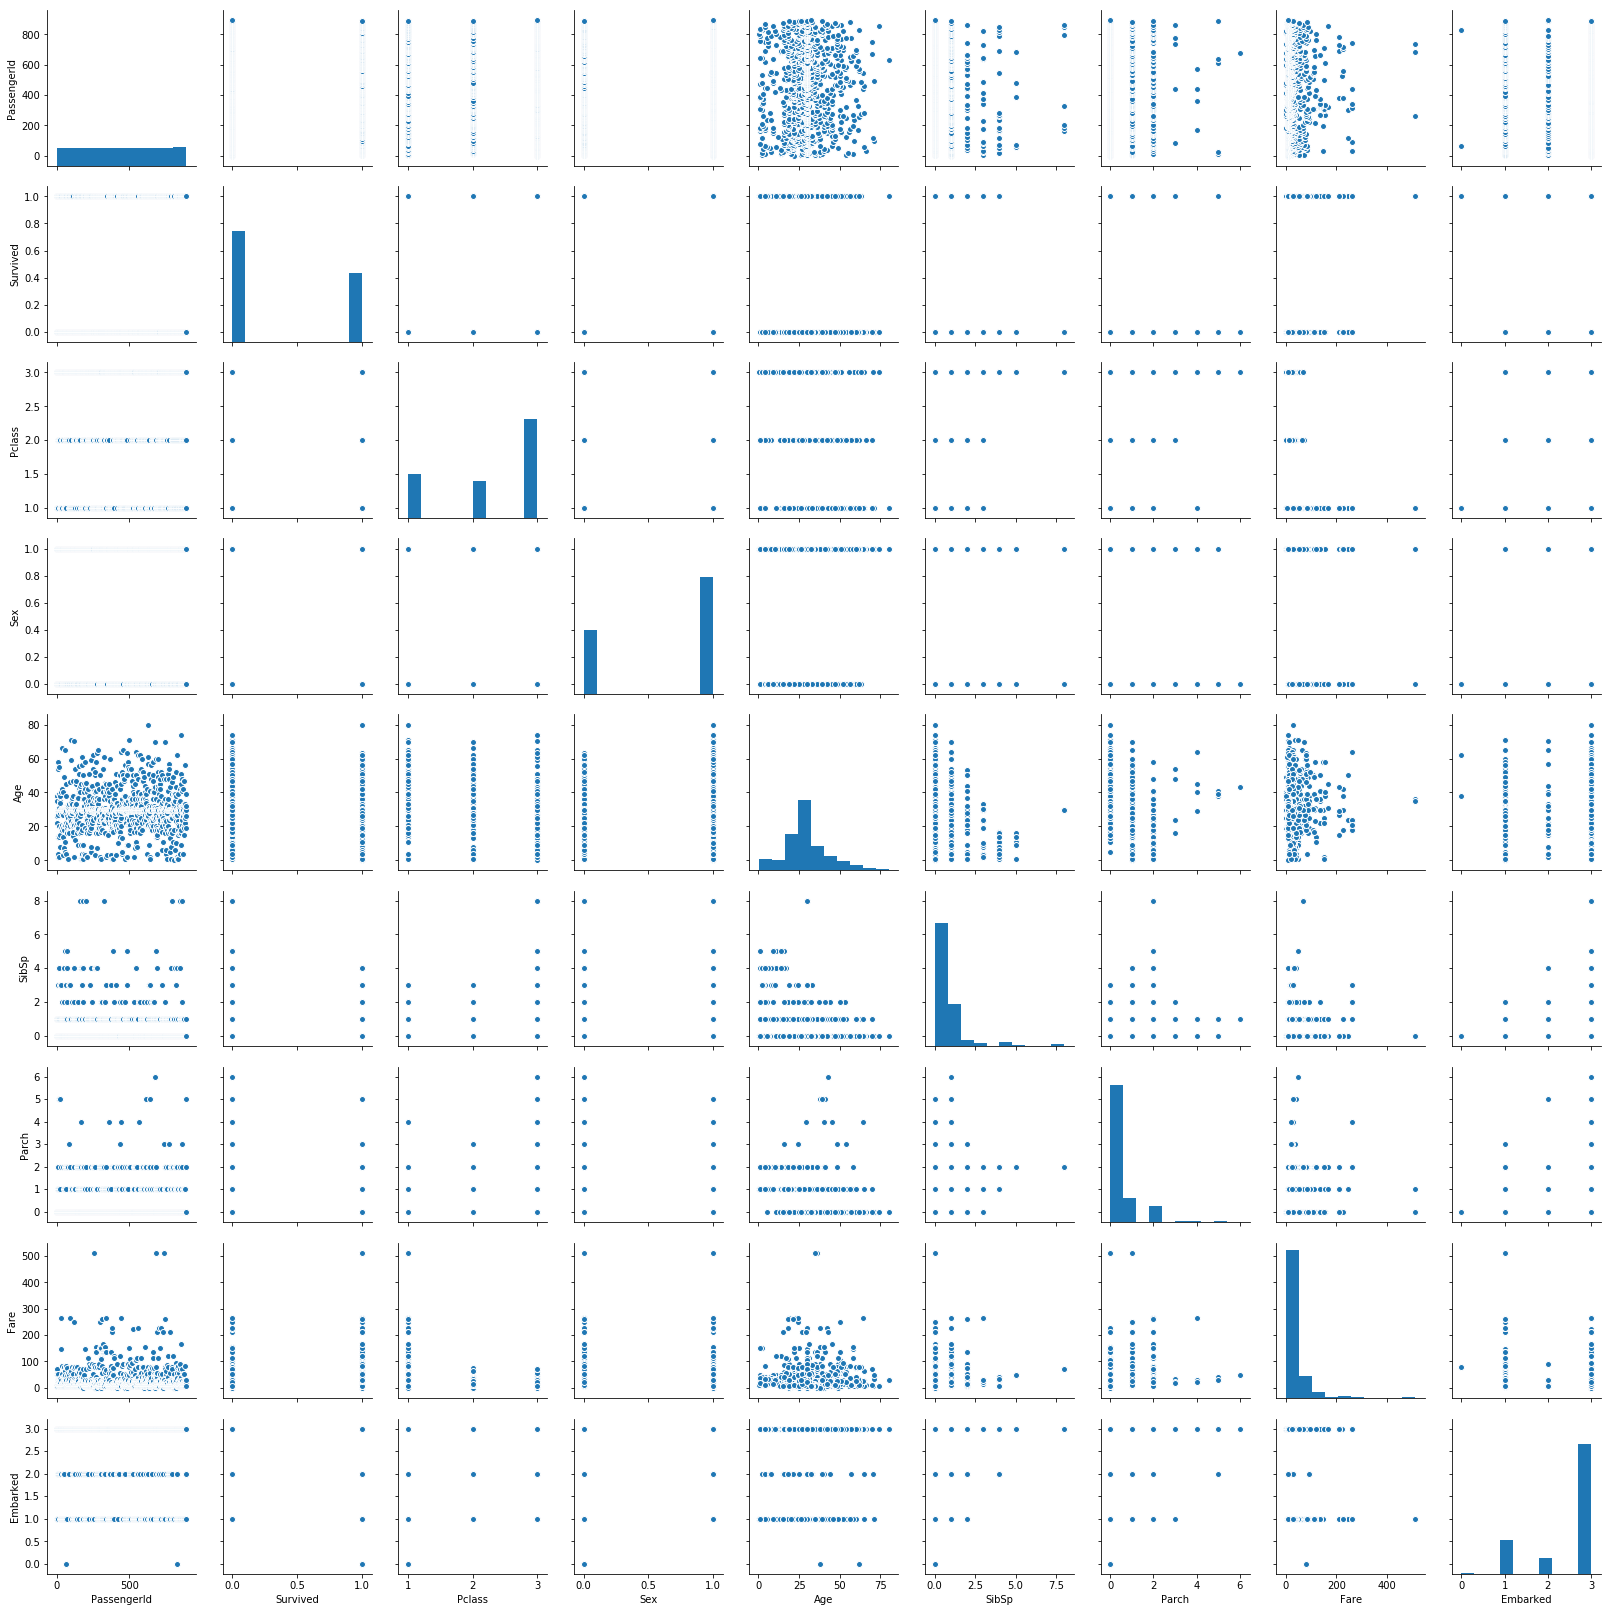

In [12]:
import numpy as np
from sklearn import preprocessing

def printLabelEncoding(title, labels):
    print(title)
    for index, item in enumerate(labels):
        print(str(index) + ": " + item)

featuresPlot = train.copy()
print("Missing values\n", featuresPlot.isnull().sum())

# replace nan values for age with the mean value
featuresPlot["Age"] = featuresPlot.loc[:, "Age"].replace(np.nan, featuresPlot.loc[:, "Age"].mean())
featuresPlot["Embarked"] = featuresPlot.loc[:, "Embarked"].replace(np.nan, "?")

# encode string data - sex and embarked
le = preprocessing.LabelEncoder()
le.fit(featuresPlot["Sex"])
featuresPlot["Sex"] = le.transform(featuresPlot.loc[:, "Sex"].values)
printLabelEncoding("\nEncoding for Sex", list(le.classes_))

le.fit(featuresPlot["Embarked"])
featuresPlot["Embarked"] = le.transform(featuresPlot.loc[:, "Embarked"].values)
printLabelEncoding("\nEncoding for Embarked", list(le.classes_))

featuresPlot.head(20)

In [ ]:
# Initial data exploration
import seaborn as sns

# Correlation matrix
featuresPlot.corr(method='pearson')

# Pair plot
sns.pairplot(featuresPlot)

In [3]:
# Feature selection
# Remove features we believe are not necessary at all -- show a correlation???
